In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:

# Konfigurasi koneksi ke database MS SQL Server
server = r'DESKTOP-R99SQKB\MSSQLSERVER01'
database = 'ok'
connection_string = (
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)


In [39]:

# Membuka koneksi ke database
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()


In [40]:

# ===================== 1. EDA Student Dimension =====================
student_dimension_data = pd.read_csv('student_dimension.csv')
print("EDA - Student Dimension Data")



EDA - Student Dimension Data


In [41]:
print(student_dimension_data.describe())


       Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  100.000000           100.000000                     100.000000   
mean    50.500000             6.075977                       1.935655   
std     29.011492             1.221806                       0.537774   
min      1.000000             4.011722                       1.045820   
25%     25.750000             4.980154                       1.516876   
50%     50.500000             6.232986                       1.963988   
75%     75.250000             7.189073                       2.281594   
max    100.000000             7.987372                       2.970304   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count           100.000000            100.000000   
mean              7.584848              1.897127   
std               0.883213              0.557063   
min               6.015779              1.002756   
25%               6.870248              1.379292   
50%               7.642552    

In [42]:
print(student_dimension_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       100 non-null    int64  
 1   Study_Hours_Per_Day              100 non-null    float64
 2   Extracurricular_Hours_Per_Day    100 non-null    float64
 3   Sleep_Hours_Per_Day              100 non-null    float64
 4   Social_Hours_Per_Day             100 non-null    float64
 5   Physical_Activity_Hours_Per_Day  100 non-null    float64
 6   GPA                              100 non-null    float64
 7   Stress_Level                     100 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 6.4 KB
None


In [43]:
print(student_dimension_data.isnull().sum())

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


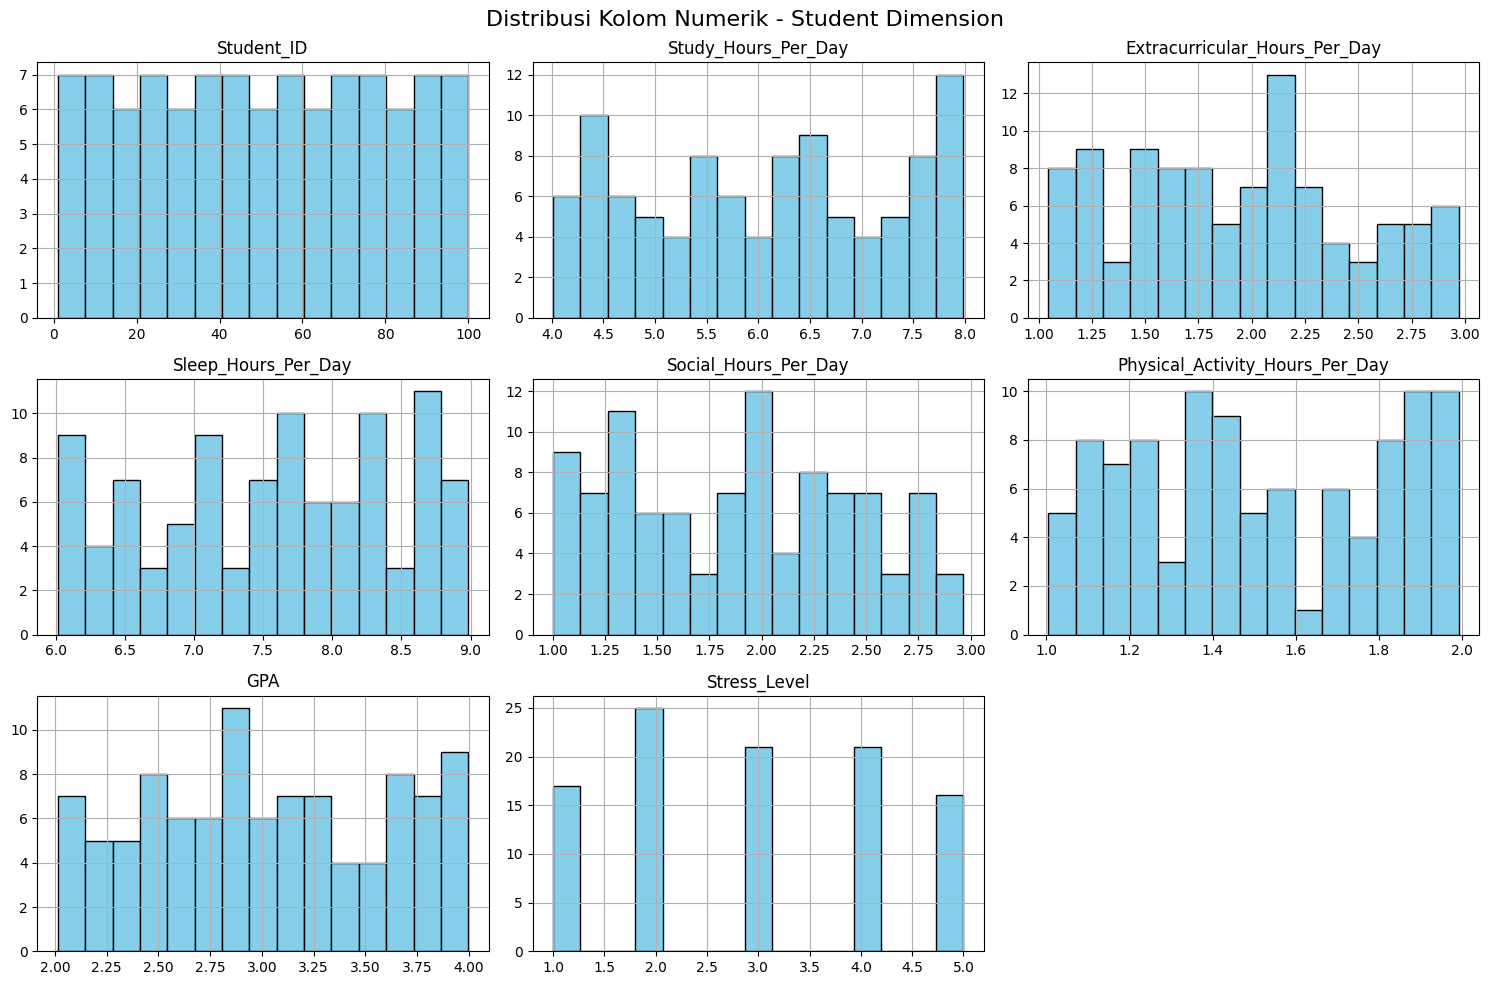

In [44]:

# Visualisasi distribusi kolom numerik
student_dimension_data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik - Student Dimension", fontsize=16)
plt.tight_layout()
plt.show()


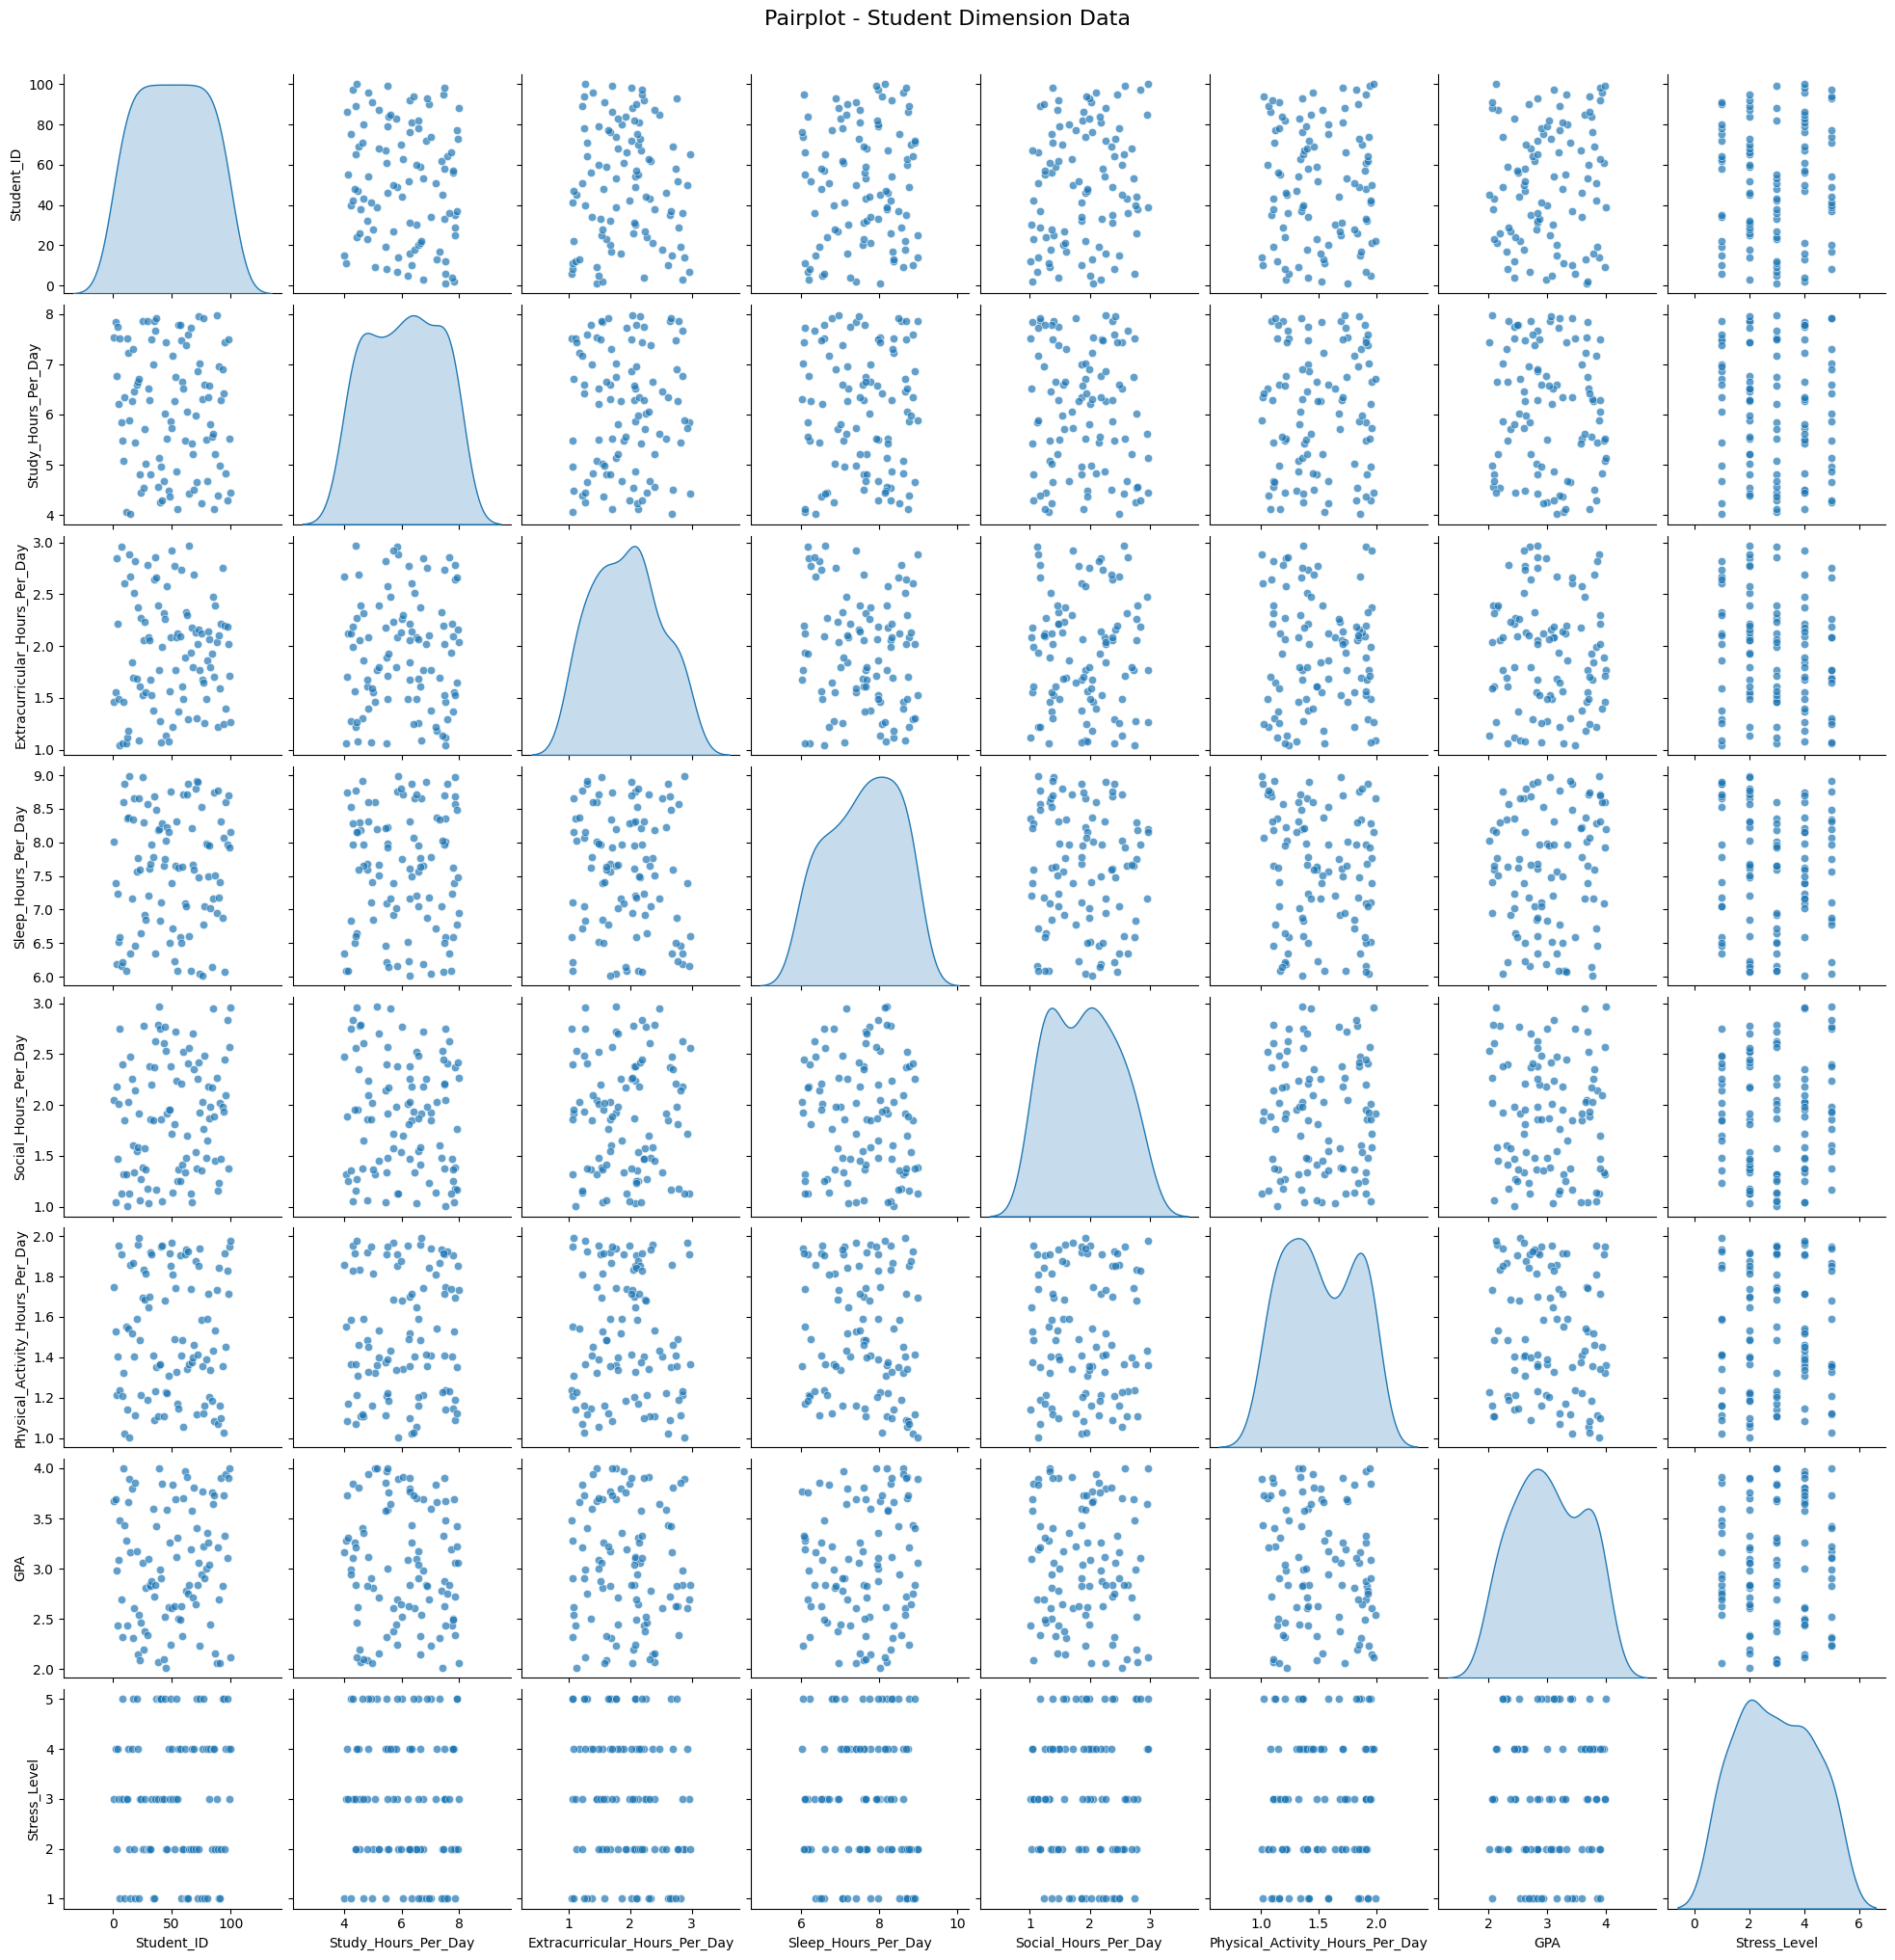

In [45]:

# Visualisasi hubungan antar variabel
sns.pairplot(student_dimension_data, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot - Student Dimension Data", y=1.02, fontsize=16)
plt.show()


In [46]:

# ===================== 2. EDA YouTube Channel Dimension =====================
youtube_channel_dimension_data = pd.read_csv('youtube_channel_dimension.csv')
print("\nEDA - YouTube Channel Dimension Data")




EDA - YouTube Channel Dimension Data


In [47]:
print(youtube_channel_dimension_data.describe())


       Subscribers
count   100.000000
mean      4.789557
std       2.745036
min       0.275538
25%       2.686022
50%       4.635161
75%       6.888358
max       9.799661


In [48]:
print(youtube_channel_dimension_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YouTube_Name      100 non-null    object 
 1   Brand_Channel     100 non-null    object 
 2   Subscribers       100 non-null    float64
 3   Primary_Language  100 non-null    object 
 4   Category          100 non-null    object 
 5   Country           100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB
None


In [49]:
print(youtube_channel_dimension_data.isnull().sum())

YouTube_Name        0
Brand_Channel       0
Subscribers         0
Primary_Language    0
Category            0
Country             0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_16832\4113438484.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Subscribers', data=youtube_channel_dimension_data, ci=None, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_16832\4113438484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Subscribers', data=youtube_channel_dimension_data, ci=None, palette='viridis')


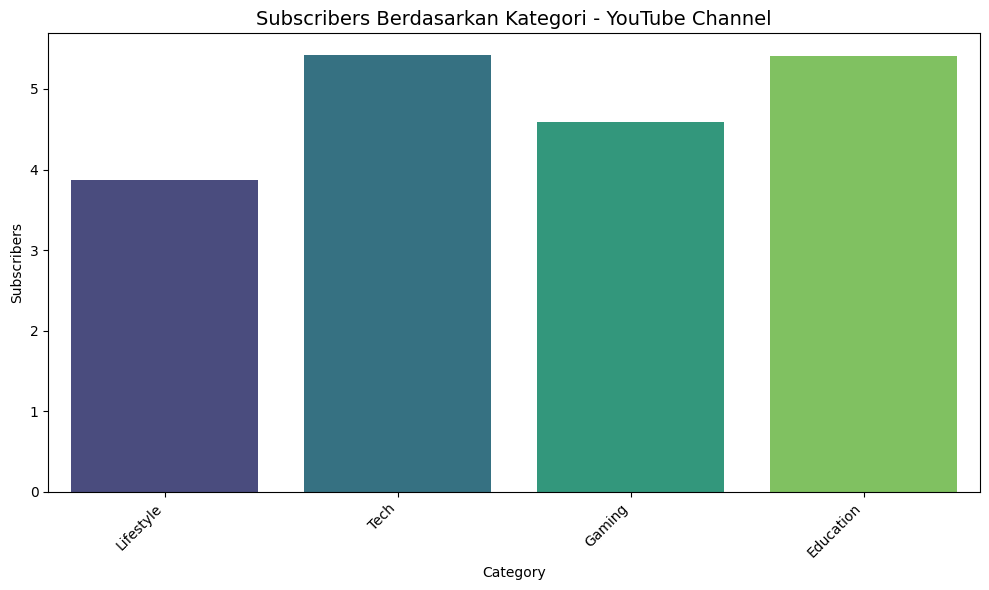

In [50]:

# Visualisasi bar plot subscribers berdasarkan kategori
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Subscribers', data=youtube_channel_dimension_data, ci=None, palette='viridis')
plt.title("Subscribers Berdasarkan Kategori - YouTube Channel", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Subscribers")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


In [51]:

# ===================== 3. EDA Student Fact =====================
student_fact_data = pd.read_csv('student_fact.csv')
print("\nEDA - Student Fact Data")
print(student_fact_data.describe())




EDA - Student Fact Data
       Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  100.000000           100.000000                     100.000000   
mean    54.560000             5.770711                       1.927477   
std     26.919003             1.140296                       0.576599   
min      1.000000             4.048639                       1.001618   
25%     34.500000             4.840521                       1.439509   
50%     56.500000             5.539248                       1.842204   
75%     73.250000             6.626692                       2.489097   
max    100.000000             7.987164                       2.959776   

              GPA  Stress_Level  
count  100.000000    100.000000  
mean     2.971452      3.140000  
std      0.540890      1.407197  
min      2.018885      1.000000  
25%      2.542435      2.000000  
50%      2.895069      3.000000  
75%      3.333841      4.000000  
max      3.967998      5.000000  


In [52]:
print(student_fact_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student_ID                     100 non-null    int64  
 1   Study_Hours_Per_Day            100 non-null    float64
 2   Extracurricular_Hours_Per_Day  100 non-null    float64
 3   GPA                            100 non-null    float64
 4   Stress_Level                   100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB
None


In [53]:
print(student_fact_data.isnull().sum())

Student_ID                       0
Study_Hours_Per_Day              0
Extracurricular_Hours_Per_Day    0
GPA                              0
Stress_Level                     0
dtype: int64


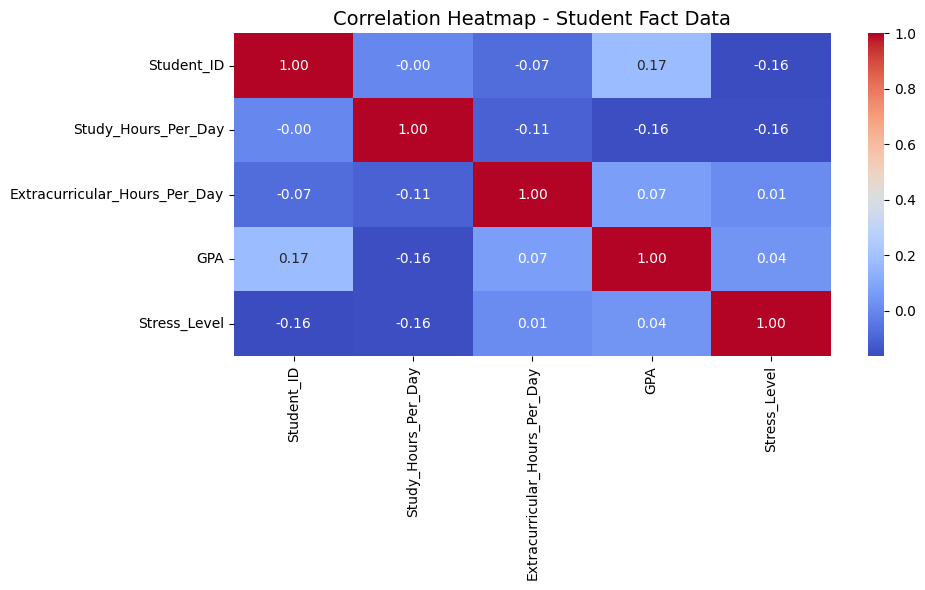

In [54]:

# Visualisasi korelasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(student_fact_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Student Fact Data", fontsize=14)
plt.tight_layout()
plt.show()


In [55]:

# ===================== 4. EDA YouTube Fact =====================
youtube_fact_data = pd.read_csv('youtube_fact.csv')
print("\nEDA - YouTube Fact Data")




EDA - YouTube Fact Data


In [56]:
print(youtube_fact_data.describe())


       Subscribers
count   100.000000
mean      5.448221
std       2.847608
min       0.372305
25%       3.029858
50%       5.914012
75%       7.732899
max       9.990799


In [57]:
print(youtube_fact_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YouTube_Name  100 non-null    object 
 1   Subscribers   100 non-null    float64
 2   Category      100 non-null    object 
 3   Country       100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [58]:
print(youtube_fact_data.isnull().sum())

YouTube_Name    0
Subscribers     0
Category        0
Country         0
dtype: int64


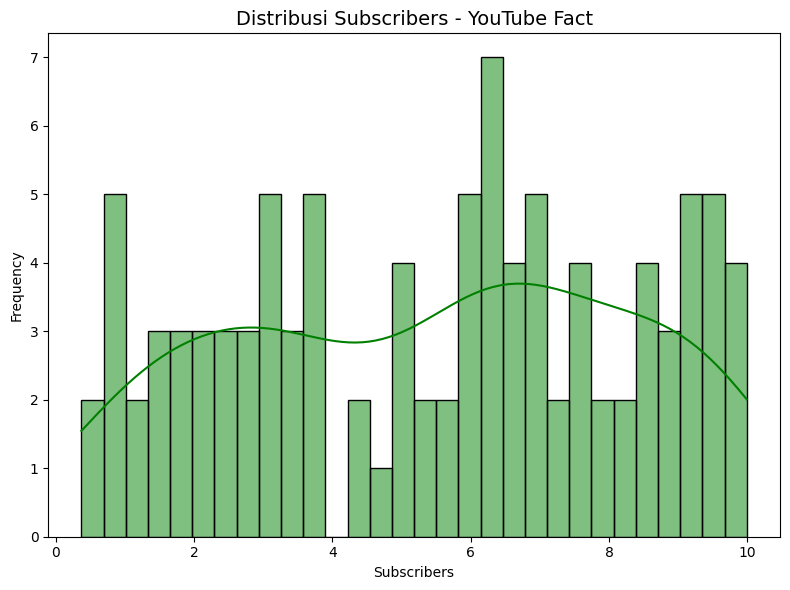

In [59]:

# Visualisasi distribusi subscribers
plt.figure(figsize=(8, 6))
sns.histplot(youtube_fact_data['Subscribers'], bins=30, kde=True, color='green')
plt.title("Distribusi Subscribers - YouTube Fact", fontsize=14)
plt.xlabel("Subscribers")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [60]:

# ===================== 5. Membuat Tabel Dimensi dan Faktual =====================
# Tabel Student_Dimension
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Student_Dimension' AND xtype='U')
CREATE TABLE Student_Dimension (
    Student_ID INT PRIMARY KEY,
    Study_Hours_Per_Day FLOAT,
    Extracurricular_Hours_Per_Day FLOAT,
    Sleep_Hours_Per_Day FLOAT,
    Social_Hours_Per_Day FLOAT,
    Physical_Activity_Hours_Per_Day FLOAT,
    GPA FLOAT,
    Stress_Level INT
);
""")


In [61]:

# Tabel YouTube_Channel_Dimension
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='YouTube_Channel_Dimension' AND xtype='U')
CREATE TABLE YouTube_Channel_Dimension (
    YouTube_Name VARCHAR(255) PRIMARY KEY,
    Brand_Channel VARCHAR(255),
    Subscribers FLOAT,
    Primary_Language VARCHAR(50),
    Category VARCHAR(100),
    Country VARCHAR(50)
);
""")


In [62]:

# Tabel Student_Fact
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Student_Fact' AND xtype='U')
CREATE TABLE Student_Fact (
    Fact_ID INT PRIMARY KEY IDENTITY(1,1),
    Student_ID INT,
    Study_Hours_Per_Day FLOAT,
    Extracurricular_Hours_Per_Day FLOAT,
    GPA FLOAT,
    Stress_Level INT,
    FOREIGN KEY (Student_ID) REFERENCES Student_Dimension(Student_ID)
);
""")


In [63]:

# Tabel YouTube_Fact
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='YouTube_Fact' AND xtype='U')
CREATE TABLE YouTube_Fact (
    Fact_ID INT PRIMARY KEY IDENTITY(1,1),
    YouTube_Name VARCHAR(255),
    Subscribers FLOAT,
    Category VARCHAR(100),
    Country VARCHAR(50),
    FOREIGN KEY (YouTube_Name) REFERENCES YouTube_Channel_Dimension(YouTube_Name)
);
""")


In [64]:

# ===================== 6. Menambahkan Index =====================
cursor.execute("""
CREATE INDEX IDX_Student_Fact_Student_ID ON Student_Fact (Student_ID);
""")
cursor.execute("""
CREATE INDEX IDX_YouTube_Fact_YouTube_Name ON YouTube_Fact (YouTube_Name);
""")
cursor.execute("""
CREATE INDEX IDX_Student_Fact_GPA ON Student_Fact (GPA);
""")


In [65]:

# ===================== 7. Mengimpor Data dari CSV =====================
# Mengimpor data ke tabel Student_Dimension
for _, row in student_dimension_data.iterrows():
    cursor.execute("""
    INSERT INTO Student_Dimension (Student_ID, Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, 
                                    Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, 
                                    GPA, Stress_Level)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    """, row['Student_ID'], row['Study_Hours_Per_Day'], row['Extracurricular_Hours_Per_Day'], 
       row['Sleep_Hours_Per_Day'], row['Social_Hours_Per_Day'], row['Physical_Activity_Hours_Per_Day'],
       row['GPA'], row['Stress_Level'])
conn.commit()


In [66]:

# Mengimpor data ke tabel YouTube_Channel_Dimension
for _, row in youtube_channel_dimension_data.iterrows():
    cursor.execute("""
    INSERT INTO YouTube_Channel_Dimension (YouTube_Name, Brand_Channel, Subscribers, Primary_Language, 
                                            Category, Country)
    VALUES (?, ?, ?, ?, ?, ?)
    """, row['YouTube_Name'], row['Brand_Channel'], row['Subscribers'], row['Primary_Language'], 
       row['Category'], row['Country'])
conn.commit()


In [67]:

# Mengimpor data ke tabel Student_Fact
for _, row in student_fact_data.iterrows():
    cursor.execute("""
    INSERT INTO Student_Fact (Student_ID, Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, GPA, Stress_Level)
    VALUES (?, ?, ?, ?, ?)
    """, row['Student_ID'], row['Study_Hours_Per_Day'], row['Extracurricular_Hours_Per_Day'], 
       row['GPA'], row['Stress_Level'])
conn.commit()


In [68]:

# Mengimpor data ke tabel YouTube_Fact
for _, row in youtube_fact_data.iterrows():
    cursor.execute("""
    INSERT INTO YouTube_Fact (YouTube_Name, Subscribers, Category, Country)
    VALUES (?, ?, ?, ?)
    """, row['YouTube_Name'], row['Subscribers'], row['Category'], row['Country'])
conn.commit()



In [69]:

# Menutup koneksi
cursor.close()
conn.close()

print("Data imported successfully from CSV!")

Data imported successfully from CSV!


In [70]:
 pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
